In [1]:

import numpy as np 
import pandas as pd
import yfinance as yf
import plotly.express as px

from datetime import date
from market import Market
from portfolio import Portfolio
from analysis import Analysis, Benchmark, Metric
from rebalance import Rebalance
from strategy import NoStrategy, StopGainAndLoss
from backtest import BackTest
from factor import DummyFactor

In [2]:

start_date = date.fromisoformat("2023-01-01")
end_date = date.fromisoformat("2023-12-21")
security_universe = ["^SPX", "^IXIC", "^RUT", "QQQ", "ARKK"]

market = Market(security_universe)
factor = DummyFactor(security_universe)
portfolio = Portfolio(100.0, start_date, end_date)
factor.set_portfolio(portfolio)

blacklist = []
# strategy = NoStrategy(portfolio, blacklist)
strategy = StopGainAndLoss(portfolio, blacklist)
strategy.set_limit(0.3, 0.3)
rebalance = Rebalance(180, portfolio, factor, blacklist)


In [3]:

backtest = BackTest(portfolio, strategy, market, rebalance)
backtest.run()

benchmark = Benchmark("^SPX", start_date, end_date).get_performance()

rebalance on 2023-01-03: [('^SPX', -0.010000000000000009), ('^IXIC', -0.010000000000000009), ('^RUT', -0.010000000000000009), ('QQQ', -0.010000000000000009), ('ARKK', -0.010000000000000009)]
2023-01-30: stop gain ARKK
rebalance on 2023-01-30: [('ARKK', 0.0), ('QQQ', 0.05217211712536049), ('^IXIC', 0.0525542708685012), ('^RUT', 0.05677362264405797), ('^SPX', 0.06099348301659471)]
2023-07-14: stop gain QQQ
rebalance on 2023-07-14: [('QQQ', 0.0), ('ARKK', 0.0), ('^IXIC', 0.07614927401205052), ('^SPX', 0.09904950601649123), ('^RUT', 0.11727793067985545)]
rebalance on 2023-09-21: [('^SPX', -0.007740544970868846), ('QQQ', 0.0), ('ARKK', 0.0), ('^IXIC', 0.0003365806395107529), ('^RUT', 0.007886014096399219)]


portfolio annulized return: 0.3716518276147083
portfolio annulized return relative to benchmark: 0.12270377183035475
information ratio: 0.003107164947863871


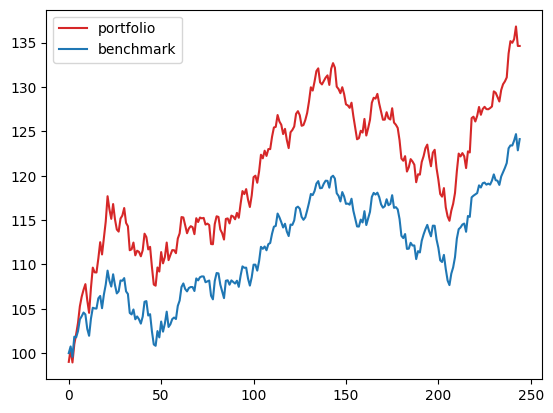

In [4]:
metric = Metric(portfolio, benchmark)
print(f"portfolio annulized return: {metric.annualized_return()}")
print(
    f"portfolio annulized return relative to benchmark: {metric.annualized_return_relative_to_benchmark()}"
)
print(f"information ratio: {metric.information_ratio()}")

analysis = Analysis(portfolio, benchmark)
analysis.draw()